In [2]:
import os
import numpy as np
from os import makedirs

BBO_experiments_dict = {
    "BBO SC/DP 10 rdkit": os.environ["DATA"] + "/07_BBO/03_bbo_optim/paper/02.01_optim_HOMO_shg_count_dp_10_steps",
    "BBO SC/DP 50 rdkit": os.environ["DATA"] + "/07_BBO/03_bbo_optim/paper/02.02_optim_HOMO_shg_count_dp_50_steps",
    "BBO SC/DP 10 obabel": os.environ["DATA"] + "/07_BBO/03_bbo_optim/paper/02.03_optim_HOMO_shg_count_dp_10_steps_obabel",
    "BBO MBTR/RBF 10 rdkit": os.environ["DATA"] + "/07_BBO/03_bbo_optim/paper/03.01_optim_HOMO_mbtr_rbf_10_steps",
    "BBO MBTR/RBF 50 rdkit": os.environ["DATA"] + "/07_BBO/03_bbo_optim/paper/03.02_optim_HOMO_mbtr_rbf_50_steps",
    "BBO MBTR/RBF 10 obabel": os.environ["DATA"] + "/07_BBO/03_bbo_optim/paper/03.03_optim_HOMO_mbtr_rbf_10_steps_obabel",
    "BBO MBTR/DP 10 rdkit": os.environ["DATA"] + "/07_BBO/03_bbo_optim/paper/04.01_optim_HOMO_mbtr_dp_10_steps",
    "BBO MBTR/DP 50 rdkit": os.environ["DATA"] + "/07_BBO/03_bbo_optim/paper/04.02_optim_HOMO_mbtr_dp_50_steps",
    "BBO MBTR/DP 10 obabel": os.environ["DATA"] + "/07_BBO/03_bbo_optim/paper/04.03_optim_HOMO_mbtr_dp_10_steps_obabel",
    "BBO SC/DP QM9 init": os.environ["DATA"] + "/07_BBO/03_bbo_optim/paper/02.04_optim_HOMO_shg_count_dp_10_steps_init_rand_QM9",
    "BBO MBTR/RBF QM9 init": os.environ["DATA"] + "/07_BBO/03_bbo_optim/paper/03.04_optim_HOMO_mbtr_rbf_10_steps_init_rand_QM9",
}

EvoMol_experiments_dict = {
    "EvoMol rdkit": os.environ["DATA"] + "/07_BBO/03_bbo_optim/paper/01.01_EvoMol_from_methane_optim_HOMO_rdkit_nocache",
    "EvoMol obabel": os.environ["DATA"] + "/07_BBO/03_bbo_optim/paper/01.02_EvoMol_from_methane_optim_HOMO_obabel_nocache",
    "EvoMol QM9 init": os.environ["DATA"] + "/07_BBO/03_bbo_optim/paper/01.03_EvoMol_from_methane_optim_HOMO_rdkit_nocache_init_rand_QM9",
    "EvoMol QM9 init pop 600": os.environ["DATA"] + "/07_BBO/03_bbo_optim/paper/01.04_EvoMol_from_methane_optim_HOMO_rdkit_nocache_init_rand_QM9_pop_600"
}

output_figures_root = os.environ["FIGURES"] + "/07_BBO/03_bbo_optim/paper/10.02_results"
makedirs(output_figures_root, exist_ok=True)

sub_experiments_names = [str(i) for i in range(1, 11)]

ECDF_TARGETS = np.arange(-10, -1, 0.01)
ERT_TARGETS = np.arange(-10, -1, 0.5)

In [3]:
groups = [
    
    (
        "",
        ["BBO MBTR/RBF 10 rdkit", "BBO SC/DP 10 rdkit", "EvoMol rdkit"],
        {
            "EvoMol rdkit": "EvoMol",
            "BBO SC/DP 10 rdkit": "BBOMol EI, DotProduct, shingles",
            "BBO MBTR/RBF 10 rdkit": "BBOMol EI, RBF, MBTR",
        },
        [0, 0, 3],
        [None, None, None]
    ),
    
    
    (
        "10 EvoMol steps",
        ["EvoMol rdkit", "BBO SC/DP 10 rdkit", "BBO MBTR/RBF 10 rdkit", "BBO MBTR/DP 10 rdkit"],
        {
            "EvoMol rdkit": "Evolutionary optimization only",
            "BBO SC/DP 10 rdkit": "BBO (Shingles,·)",
            "BBO MBTR/RBF 10 rdkit": "BBO (MBTR,RBF)",
            "BBO MBTR/DP 10 rdkit": "BBO (MBTR,·)",
        },
        [1, 0, 0, 0],
        [None, None, None, None]
    ),
    (
        "50 EvoMol steps",
        ["EvoMol rdkit", "BBO SC/DP 50 rdkit", "BBO MBTR/RBF 50 rdkit", "BBO MBTR/DP 50 rdkit"],
        {
            "EvoMol rdkit": "Evolutionary optimization only",
            "BBO SC/DP 50 rdkit": "BBO (Shingles,·)",
            "BBO MBTR/RBF 50 rdkit": "BBO (MBTR,RBF)",
            "BBO MBTR/DP 50 rdkit": "BBO (MBTR,·)"
        },
        [1, 0, 0, 0],
        [None, None, None, None]
    ),
    (
        "MM",
        ["EvoMol rdkit", "EvoMol obabel", "BBO SC/DP 10 rdkit", "BBO SC/DP 10 obabel", "BBO MBTR/RBF 10 rdkit",  
         "BBO MBTR/RBF 10 obabel", "BBO MBTR/DP 10 rdkit", "BBO MBTR/DP 10 obabel"],
        {
        },
        [0, 1, 0, 1, 0, 1, 0, 1],
        [0, 0, 1, 1, 2, 2, 3, 3]
    ),
    (
        "QM9 init",
        ["BBO SC/DP 10 rdkit", "BBO SC/DP QM9 init", "BBO MBTR/RBF 10 rdkit", "BBO MBTR/RBF QM9 init", 
         "EvoMol rdkit", "EvoMol QM9 init", "EvoMol QM9 init pop 600"],
        {
            
        },
        [0, 0, 1, 1, 2, 2, 2],
        [0, 1, 0, 1, 0, 1, 1]
    )
    
    
    
]


In [4]:
from bbomol.postprocessing.postprocessing import extract_multiple_BBO_experiments_data, extract_multiple_evomol_experiments_data

def extract_all_data(BBO_experiments_dict, EvoMol_experiments_dict, sub_experiments_names):
    
    results_dict = {}
    
    for exp_name, path in BBO_experiments_dict.items():
        results_dict[exp_name] = extract_multiple_BBO_experiments_data(path, sub_experiments_names)
        
    for exp_name, path in EvoMol_experiments_dict.items():
        results_dict[exp_name] = extract_multiple_evomol_experiments_data(path, sub_experiments_names)

    return results_dict

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", color_codes=True)
from bbomol.postprocessing.evaluation import compute_ecdf, compute_best_so_far_matrix

from os.path import join
import pandas as pd
from matplotlib.ticker import FuncFormatter
linestyles = ['solid', 'dashed', 'dotted', 'dashdot', (0, (5, 10)), (0, (3, 10, 1, 10)), (0, (1, 10))]
markers = ['s', '^', 'o', '+', 'x']
from math import floor


def plot_best_so_far(results_dict, plot_title=None, exp_list_plot=None, labels_dict=None, 
                     classes_dashes=None, classes_markers=None, metric="mean", ylim=None):
    
    plt.figure(figsize=(7, 7))
    
    if plot_title is not None:        
        plt.title(plot_title)
    
    if exp_list_plot is None:
        exp_list_plot = list(results_dict.keys())
        
    for i, experiment_name in enumerate(exp_list_plot):
        
        if experiment_name in exp_list_plot:
            
            if labels_dict is not None and experiment_name in labels_dict:
                display_experiment_name = labels_dict[experiment_name]
            else:
                display_experiment_name = experiment_name
                
               
            max_obj_calls = np.max([np.max(obj_calls_vect) for obj_calls_vect in results_dict[experiment_name]["dataset_success_n_calls"]])
                
            obj_calls, best_so_far_matrix = compute_best_so_far_matrix(
                results_dict[experiment_name]["dataset_success_n_calls"],
                results_dict[experiment_name]["dataset_success_obj_value"],
                max_obj_calls=max_obj_calls
            )
            
            
            if classes_dashes is None:
                linestyle = linestyles[0]
            else:
                linestyle = linestyles[classes_dashes[i]]
                
            if classes_markers is None:
                marker = None
            else:
                marker = markers[classes_markers[i]] if classes_markers[i] is not None else None
                
                
            if experiment_name == "EvoMol rdkit":
                
                if metric == "mean" or metric == "both":
                    plt.plot(obj_calls, best_so_far_matrix.mean(axis=0), label=display_experiment_name, 
                             linestyle=linestyle, markevery=100, color=sns.color_palette()[3])
                    plt.ylabel("HOMO (eV)")
                if metric == "min_max" or metric == "both":
                    plt.fill_between(obj_calls, best_so_far_matrix.min(axis=0), best_so_far_matrix.max(axis=0),
                                     alpha=0.2, color=sns.color_palette()[3])
                
            else:
            
                if metric == "mean" or metric == "both":
                    plt.plot(obj_calls, best_so_far_matrix.mean(axis=0), label=display_experiment_name, 
                             linestyle=linestyle, markevery=100)
                    plt.ylabel("HOMO (eV)")
                if metric == "min_max" or metric == "both":
                    plt.fill_between(obj_calls, best_so_far_matrix.min(axis=0), best_so_far_matrix.max(axis=0),
                                     alpha=0.2)
#                                  label=display_experiment_name, )

                
        
    plt.legend(loc="lower right")
    plt.xlim(1, 1000)
    if ylim is not None:
        plt.ylim(ylim)
#     plt.xlabel("Number of DFT calls")
    plt.savefig(join(output_figures_root, "best_so_far_" + metric + "_" + plot_title +".png"), dpi=600)
    plt.show()
    

def plot_ECDF(results_dict, plot_title=None, exp_list_plot=None, exp_list_details=None, labels_dict=None, 
              classes_dashes=None, classes_markers=None):
    
    colors = sns.color_palette()
    
    plt.figure(figsize=(7, 3))
#     fig, ax = plt.subplots()
#     ax2 = ax.twinx()
#     ax.get_shared_y_axes().join(ax,ax2)
    
    if plot_title is not None:        
        plt.title(plot_title)
    
    if exp_list_plot is None:
        exp_list_plot = list(results_dict.keys())
        
    for i, experiment_name in enumerate(exp_list_plot):
        
        if experiment_name in exp_list_plot:
            
            if labels_dict is not None and experiment_name in labels_dict:
                display_experiment_name = labels_dict[experiment_name]
            else:
                display_experiment_name = experiment_name
        
            for j in range(len(results_dict[experiment_name]["dataset_success_n_calls"])):

                if exp_list_details is not None and experiment_name in exp_list_details:
                    obj_calls, ecdf_vect = compute_ecdf(
                        obj_calls_list=[results_dict[experiment_name]["dataset_success_n_calls"][j]],
                        obj_values_list=[results_dict[experiment_name]["dataset_success_obj_value"][j]],
                        targets=ECDF_TARGETS
                    )
                    sns.lineplot(obj_calls, ecdf_vect, label=display_experiment_name, color=colors[i], 
                                 dashes=[(2, 2)], style=True)
                    plt.scatter([obj_calls[-1]], [ecdf_vect[-1]], color="black")

            obj_calls, ecdf_vect = compute_ecdf(
                obj_calls_list=results_dict[experiment_name]["dataset_success_n_calls"],
                obj_values_list=results_dict[experiment_name]["dataset_success_obj_value"],
                targets=ECDF_TARGETS
            )
            
            if classes_dashes is None:
                linestyle = linestyles[0]
            else:
                linestyle = linestyles[classes_dashes[i]]
                
            if classes_markers is None:
                marker = None
            else:
                marker = markers[classes_markers[i]] if classes_markers[i] is not None else None
                
            plt.plot(obj_calls, ecdf_vect, label=display_experiment_name, linestyle=linestyle, markevery=100)
    
    
    plt.legend(loc="lower right")
    plt.xlim(1, 1000)
    plt.ylim(0.4, 0.9)
    plt.xlabel("# calls to QM calculations")
    plt.ylabel("Proportion of targets achieved")
#     plt.hlines(0.7788, 0, 1000)
    
#     ax2.yaxis.set_major_formatter(FuncFormatter(lambda x,pos: f"{ECDF_TARGETS[int(x*len(ECDF_TARGETS))]:.0f}" if x<1 else ""))
    
#     ax2 = plt.twinx()
#     ax2.set_ylim(min(ECDF_TARGETS), max(ECDF_TARGETS))
#     ax2.set_ylabel("HOMO energy (eV)")
    
    plt.savefig(join(output_figures_root, "ecdf_" + plot_title +".png"), dpi=600, bbox_inches='tight')
    plt.show()

In [13]:
from bbomol.postprocessing.evaluation import compute_timestamps_ecdf

def plot_ECDF_timestamps(results_dict, plot_title=None, exp_list_plot=None, exp_list_details=None,
                         labels_dict=None, classes_dashes=None, classes_markers=None):
    
    colors = sns.color_palette()
    
    plt.figure(figsize=(7, 5))
    
    if plot_title is not None:        
        plt.title(plot_title)
    
    if exp_list_plot is None:
        exp_list_plot = list(results_dict.keys())
        
    for i, experiment_name in enumerate(exp_list_plot):
        
        if experiment_name in exp_list_plot:
            
            if labels_dict is not None and experiment_name in labels_dict:
                display_experiment_name = labels_dict[experiment_name]
            else:
                display_experiment_name = experiment_name
                
            for j in range(len(results_dict[experiment_name]["timestamps"])):

                if exp_list_details is not None and experiment_name in exp_list_details:
                    obj_calls, ecdf_vect = compute_ecdf(
                        obj_calls_list=[results_dict[experiment_name]["timestamps"][j]],
                        obj_values_list=[results_dict[experiment_name]["best_scores_timestamps"][j]],
                        targets=ECDF_TARGETS
                    )
                    sns.lineplot(obj_calls/3600, ecdf_vect, label=display_experiment_name, color=colors[i], 
                                 dashes=[(2, 2)], style=True)
                    plt.scatter([obj_calls[-1]], [ecdf_vect[-1]], color="black")
                

            obj_calls, ecdf_vect = compute_timestamps_ecdf(
                timestamps_list=results_dict[experiment_name]["timestamps"],
                obj_values_list=results_dict[experiment_name]["best_scores_timestamps"],
                targets=ECDF_TARGETS
            )
            
            if classes_dashes is None:
                linestyle = linestyles[0]
            else:
                linestyle = linestyles[classes_dashes[i]]
                
            if classes_markers is None:
                marker = None
            else:
                marker = markers[classes_markers[i]] if classes_markers[i] is not None else None
                
            plt.plot(obj_calls/3600, ecdf_vect, label=display_experiment_name, linestyle=linestyle, markevery=100)
    
    
    plt.legend(loc="lower right")
    plt.xlim(0, 60)
    plt.ylim(0, 1)
    plt.xlabel("Time (h)")
    plt.ylabel("Proportion of targets achieved")
#     ax2 = plt.twinx()
#     ax2.set_ylim(min(ECDF_TARGETS), max(ECDF_TARGETS))
#     ax2.set_ylabel("HOMO energy (eV)")
    
    plt.savefig(join(output_figures_root, "ecdf_timestamps" + plot_title +".png"), dpi=600)
    plt.show()

In [14]:
from bbomol.postprocessing.evaluation import compute_ERT, compute_ERT_timestamps
import pandas as pd
from IPython.display import display, HTML

def display_ERT(results_dict, plot_title=None, exp_list_plot=None, labels_dict=None):
    
    output_keys = ["Experiment"] + [str(value) for value in ERT_TARGETS]
    ERT_dict = {output_key: [] for output_key in output_keys}
    
    if plot_title is not None:
        display(HTML("<h3>" + plot_title +"</h3>"))

    if exp_list_plot is None:
        exp_list_plot = list(results_dict.keys())
    
    for i, experiment_name in enumerate(exp_list_plot):
        
        if labels_dict is not None and experiment_name in labels_dict:
            display_experiment_name = labels_dict[experiment_name]
        else:
            display_experiment_name = experiment_name
        
        ERT_vect, success_vect = compute_ERT(
            obj_calls_list=results_dict[experiment_name]["dataset_success_n_calls"],
            obj_values_list=results_dict[experiment_name]["dataset_success_obj_value"],
            targets=ERT_TARGETS
        )
        
        ERT_dict["Experiment"].append(display_experiment_name)
        for j in range(len(ERT_vect)):
            ERT_dict[output_keys[j+1]].append(str(ERT_vect[j]) + " (" + str(success_vect[j]) + ")") 
    
    df = pd.DataFrame.from_dict(ERT_dict)
    display(df)
    
    
def display_ERT_timestamps(results_dict, plot_title=None, exp_list_plot=None, labels_dict=None):
    
    output_keys = ["Experiment"] + [str(value) for value in ERT_TARGETS]
    ERT_dict = {output_key: [] for output_key in output_keys}
    
    if plot_title is not None:
        display(HTML("<h3>" + plot_title +"</h3>"))

    if exp_list_plot is None:
        exp_list_plot = list(results_dict.keys())
    
    for i, experiment_name in enumerate(exp_list_plot):
        
        if labels_dict is not None and experiment_name in labels_dict:
            display_experiment_name = labels_dict[experiment_name]
        else:
            display_experiment_name = experiment_name
                    
        ERT_vect, success_vect = compute_ERT_timestamps(
            timestamps_list=results_dict[experiment_name]["timestamps"],
            obj_values_list=results_dict[experiment_name]["best_scores_timestamps"],
            targets=ERT_TARGETS,
            effective_last_timestamp_list=results_dict[experiment_name]["effective_last_timestamp"]
        )
        
        ERT_dict["Experiment"].append(display_experiment_name)
        for j in range(len(ERT_vect)):
            ERT_dict[output_keys[j+1]].append(str(ERT_vect[j]) + " (" + str(success_vect[j]) + ")") 
    
    df = pd.DataFrame.from_dict(ERT_dict)
    display(df)

In [15]:
import itertools

def display_stable_proportion(results_dict, plot_title=None, exp_list_plot=None, labels_dict=None):
    
    output_keys = ["Experiment", "# Stable", "# Generated", "Stable proportion (%)", "# Unique stable",
                   "# Unique generated", "Unique stable proportion (%)", "Unique stable ∩ unstable"]
    output_dict = {output_key: [] for output_key in output_keys}
    
    if plot_title is not None:
        display(HTML("<h3>" + plot_title +"</h3>"))

    if exp_list_plot is None:
        exp_list_plot = list(results_dict.keys())
        
    for i, experiment_name in enumerate(exp_list_plot):

        if labels_dict is not None and experiment_name in labels_dict:
            display_experiment_name = labels_dict[experiment_name]
        else:
            display_experiment_name = experiment_name
            
        stable_smiles = list(itertools.chain(*results_dict[experiment_name]["dataset_success_smiles"]))
        unstable_smiles = list(itertools.chain(*results_dict[experiment_name]["dataset_failed_smiles"]))
            
        stable_smiles_unique = list(np.unique(stable_smiles))
        unstable_smiles_unique = list(np.unique(unstable_smiles))
        
        intersection = np.intersect1d(stable_smiles_unique, unstable_smiles_unique)
            
        n_stable = len(stable_smiles)
        n_unstable = len(unstable_smiles)
        n_unique_stable = len(stable_smiles_unique)
        n_unique_unstable = len(unstable_smiles_unique)
        
        total_smiles = n_stable + n_unstable
        total_unique_smiles = n_unique_stable + n_unique_unstable

        stable_prop = n_stable / total_smiles * 100
        unique_stable_prop = n_unique_stable / total_unique_smiles * 100
        
        output_dict["Experiment"].append(display_experiment_name)
        
        output_dict["# Stable"].append(n_stable)
        output_dict["# Generated"].append(total_smiles)
        output_dict["Stable proportion (%)"].append(stable_prop)

        output_dict["# Unique stable"].append(n_unique_stable)
        output_dict["# Unique generated"].append(total_unique_smiles)
        output_dict["Unique stable proportion (%)"].append(unique_stable_prop)
        
        output_dict["Unique stable ∩ unstable"].append(len(intersection))
    
    df = pd.DataFrame.from_dict(output_dict)
    display(df)
    
def plot_stable_dynamics(results_dict, plot_title=None, exp_list_plot=None, labels_dict=None,
                         classes_dashes=None, classes_markers=None):
    
    if exp_list_plot is None:
        exp_list_plot = list(results_dict.keys())
    
    plt.figure(figsize=(8, 6))
    plt.xscale("linear")
    
    for i, experiment_name in enumerate(exp_list_plot):

        if labels_dict is not None and experiment_name in labels_dict:
            display_experiment_name = labels_dict[experiment_name]
        else:
            display_experiment_name = experiment_name
            
        stable_n_calls = np.array(list(itertools.chain(*results_dict[experiment_name]["dataset_success_n_calls"])))
        unstable_n_calls = np.array(list(itertools.chain(*results_dict[experiment_name]["dataset_failed_n_calls"])))
        ecdf = np.zeros((1000,))
        
        for j in range(1000):
            ecdf[j] = np.sum(unstable_n_calls <=j)

            
        if classes_dashes is None:
            linestyle = linestyles[0]
        else:
            linestyle = linestyles[classes_dashes[i]]

        if classes_markers is None:
            marker = None
        else:
            marker = markers[classes_markers[i]] if classes_markers[i] is not None else None
            
        plt.plot(np.arange(1000), ecdf, label=display_experiment_name, linestyle=linestyle, marker=marker,
                 markevery=100)
        plt.xlabel("# DFT calls")
        plt.ylabel("# unstable solutions (cumulative)")
    
    plt.legend()
    plt.savefig(join(output_figures_root, "unstable_cumulative_" + plot_title +".png"), dpi=300)
    plt.show()
        


In [16]:
def display_times(results_dict, plot_title=None, exp_list_plot=None, labels_dict=None):

    output_keys = ["Experiment", "Mean step time", "Mean optim. time", "Mean desc. obj. comput. time"]
    output_dict = {output_key: [] for output_key in output_keys}
    
    if plot_title is not None:
        display(HTML("<h3>" + plot_title +"</h3>"))

    if exp_list_plot is None:
        exp_list_plot = list(results_dict.keys())

    for i, experiment_name in enumerate(exp_list_plot):

        if labels_dict is not None and experiment_name in labels_dict:
            display_experiment_name = labels_dict[experiment_name]
        else:
            display_experiment_name = experiment_name
            
        if "steps_step_duration" in results_dict[experiment_name]:
            mean_step_time = np.mean(list(itertools.chain(*results_dict[experiment_name]["steps_step_duration"])))
            mean_optim_time = np.mean(list(itertools.chain(*results_dict[experiment_name]["steps_optim_duration"])))
            mean_desc_obj_time = np.mean(list(itertools.chain(*results_dict[experiment_name]["steps_desc_obj_comput_duration"])))
        else:
            mean_step_time = None
            mean_optim_time = None
            mean_desc_obj_time = None
        
        output_dict["Experiment"].append(display_experiment_name)
        output_dict["Mean step time"].append(mean_step_time)
        output_dict["Mean optim. time"].append(mean_optim_time)
        output_dict["Mean desc. obj. comput. time"].append(mean_desc_obj_time)
        
    df = pd.DataFrame.from_dict(output_dict)
    display(df)
        

In [17]:
results_dict = extract_all_data(BBO_experiments_dict, EvoMol_experiments_dict, sub_experiments_names)

# Best so far  (mean)

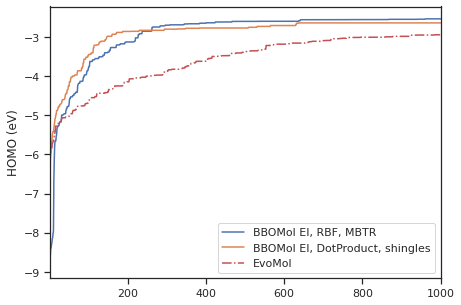

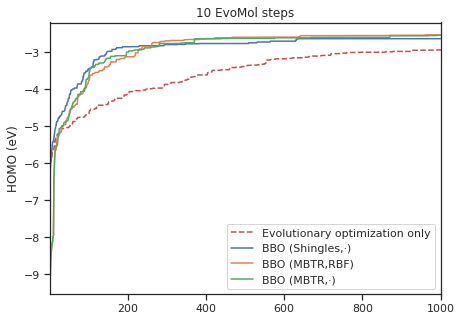

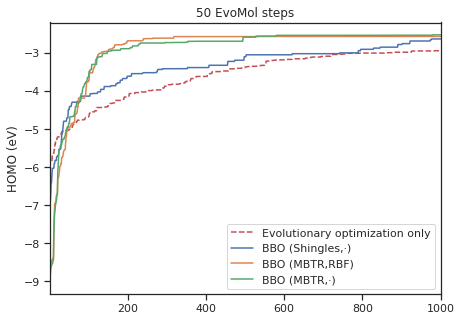

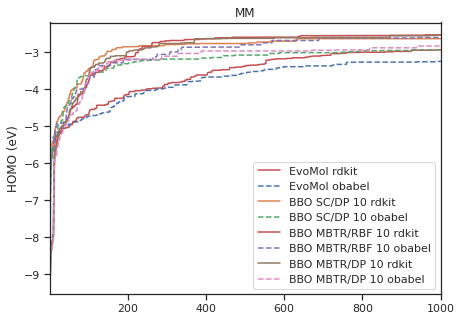

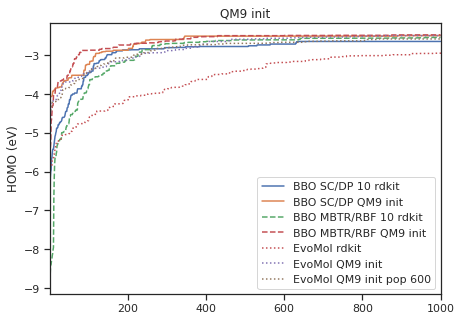

In [58]:
for group in groups:
    plot_best_so_far(results_dict, group[0], group[1], labels_dict=group[2], classes_dashes=group[3],
                     classes_markers=group[4], metric="mean")

# Best so far (min_max)

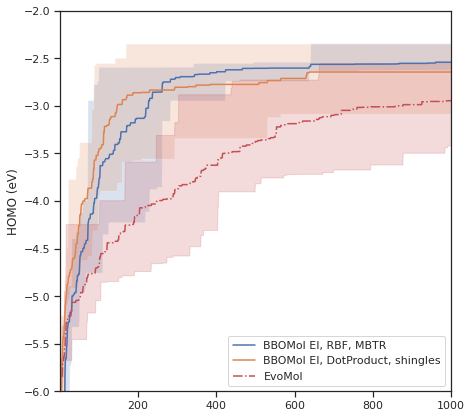

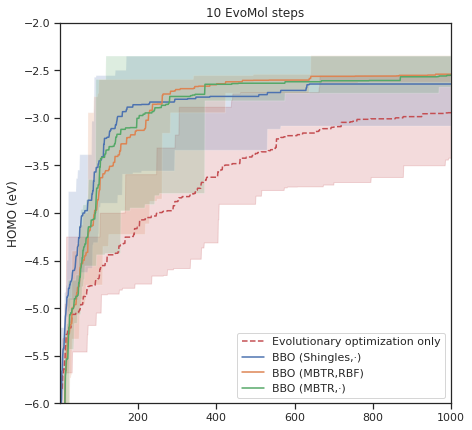

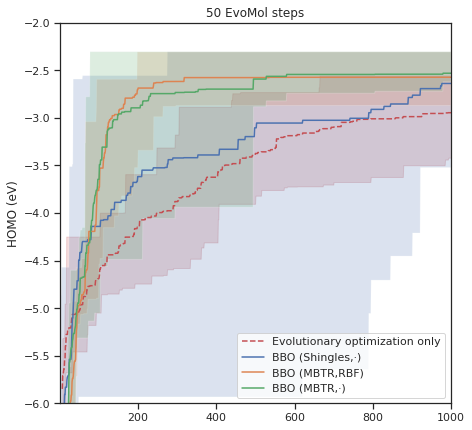

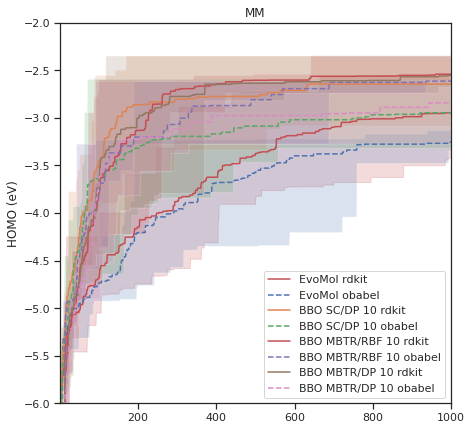

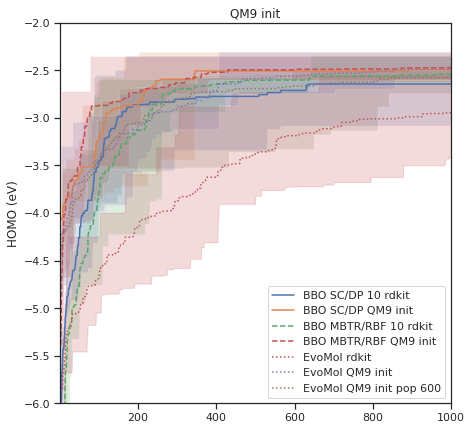

In [18]:
for group in groups:
    plot_best_so_far(results_dict, group[0], group[1], labels_dict=group[2], classes_dashes=group[3],
                     classes_markers=group[4], metric="both", ylim=(-6, -2))

# ECDF (Empirical cumulative distribution functions)

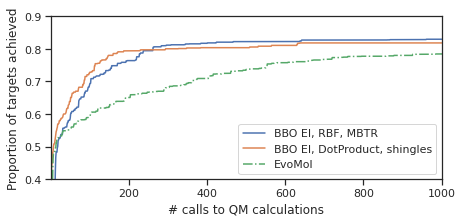

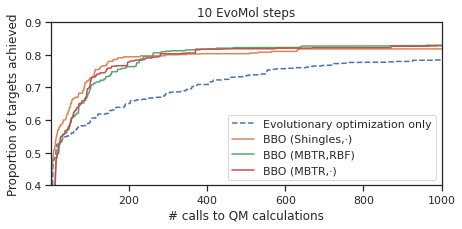

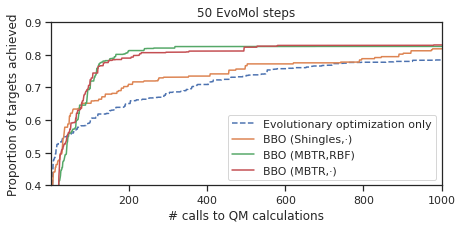

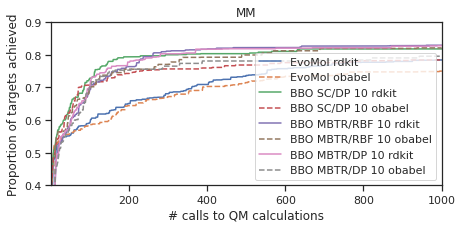

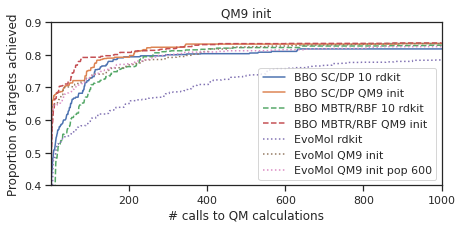

In [40]:
for group in groups:
    plot_ECDF(results_dict, group[0], group[1], labels_dict=group[2], classes_dashes=group[3],
              classes_markers=group[4])

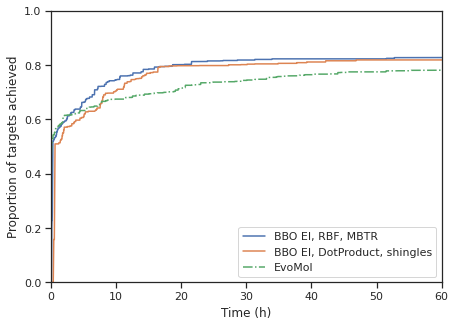

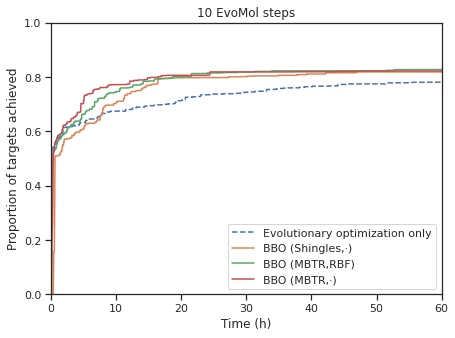

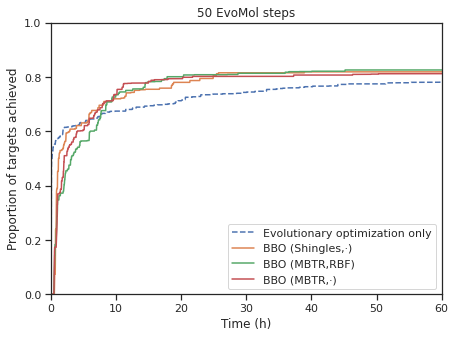

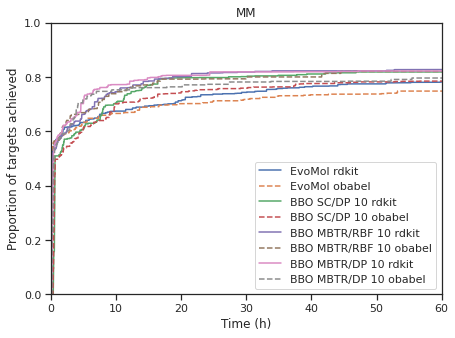

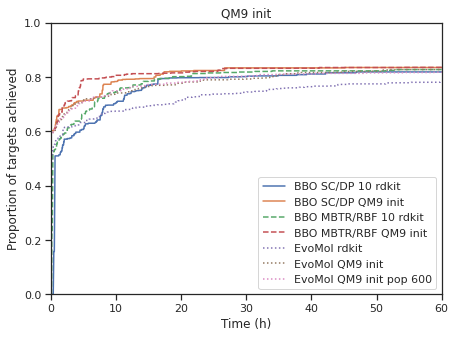

In [41]:
for group in groups:
    plot_ECDF_timestamps(results_dict, group[0], group[1], labels_dict=group[2], classes_dashes=group[3],
              classes_markers=group[4])

# ERT (Expected running time)

In [17]:
for group in groups:
    display_ERT(results_dict, group[0], group[1], labels_dict=group[2])

Experiment       -10.0        -9.5        -9.0  \
0             BBOMol EI, RBF, MBTR  1.0 (10.0)  1.0 (10.0)  1.4 (10.0)   
1  BBOMol EI, DotProduct, shingles  1.0 (10.0)  1.0 (10.0)  1.1 (10.0)   
2                           EvoMol  1.6 (10.0)  1.6 (10.0)  2.0 (10.0)   

         -8.5        -8.0         -7.5         -7.0         -6.5         -6.0  \
0  4.4 (10.0)  9.2 (10.0)  11.9 (10.0)  12.1 (10.0)  12.5 (10.0)  13.3 (10.0)   
1  1.1 (10.0)  1.9 (10.0)   2.3 (10.0)   2.3 (10.0)   2.5 (10.0)   2.9 (10.0)   
2  2.0 (10.0)  2.0 (10.0)   2.0 (10.0)   2.0 (10.0)   4.1 (10.0)   5.3 (10.0)   

          -5.5         -5.0          -4.5          -4.0          -3.5  \
0  17.3 (10.0)  32.4 (10.0)   68.4 (10.0)  107.9 (10.0)  166.5 (10.0)   
1   5.5 (10.0)  18.2 (10.0)   47.3 (10.0)   63.5 (10.0)  132.0 (10.0)   
2  10.5 (10.0)  45.6 (10.0)  170.4 (10.0)  235.1 (10.0)  522.9 (10.0)   

                       -3.0                      -2.5       -2.0       -1.5  
0              177.4 (10.0)  3151.3333333333335 (3.0)  inf (0.0)  inf (0.0)  
1  376.55555555555554 (9.0)              1822.5 (4.0)  inf (0.0)  inf (0.0)  
2  1185.6666666666667 (6.0)                 inf (0.0)  inf (0.0)  inf (0.0)

Experiment       -10.0        -9.5        -9.0  \
0  Evolutionary optimization only  1.6 (10.0)  1.6 (10.0)  2.0 (10.0)   
1                BBO (Shingles,·)  1.0 (10.0)  1.0 (10.0)  1.1 (10.0)   
2                  BBO (MBTR,RBF)  1.0 (10.0)  1.0 (10.0)  1.4 (10.0)   
3                    BBO (MBTR,·)  1.0 (10.0)  1.7 (10.0)  2.4 (10.0)   

         -8.5        -8.0         -7.5         -7.0         -6.5         -6.0  \
0  2.0 (10.0)  2.0 (10.0)   2.0 (10.0)   2.0 (10.0)   4.1 (10.0)   5.3 (10.0)   
1  1.1 (10.0)  1.9 (10.0)   2.3 (10.0)   2.3 (10.0)   2.5 (10.0)   2.9 (10.0)   
2  4.4 (10.0)  9.2 (10.0)  11.9 (10.0)  12.1 (10.0)  12.5 (10.0)  13.3 (10.0)   
3  5.2 (10.0)  9.4 (10.0)  10.6 (10.0)  11.4 (10.0)  11.7 (10.0)  14.7 (10.0)   

          -5.5         -5.0          -4.5          -4.0          -3.5  \
0  10.5 (10.0)  45.6 (10.0)  170.4 (10.0)  235.1 (10.0)  522.9 (10.0)   
1   5.5 (10.0)  18.2 (10.0)   47.3 (10.0)   63.5 (10.0)  132.0 (10.0)   
2  17.3 (10.0)  32.4 (10.0)   68.4 (10.0)  107.9 (10.0)  166.5 (10.0)   
3  17.4 (10.0)  31.1 (10.0)   63.4 (10.0)   85.3 (10.0)  159.8 (10.0)   

                       -3.0                      -2.5       -2.0       -1.5  
0  1185.6666666666667 (6.0)                 inf (0.0)  inf (0.0)  inf (0.0)  
1  376.55555555555554 (9.0)              1822.5 (4.0)  inf (0.0)  inf (0.0)  
2              177.4 (10.0)  3151.3333333333335 (3.0)  inf (0.0)  inf (0.0)  
3              173.1 (10.0)              4490.0 (2.0)  inf (0.0)  inf (0.0)

Experiment       -10.0        -9.5        -9.0  \
0  Evolutionary optimization only  1.6 (10.0)  1.6 (10.0)  2.0 (10.0)   
1                BBO (Shingles,·)  1.3 (10.0)  1.3 (10.0)  1.4 (10.0)   
2                  BBO (MBTR,RBF)  1.0 (10.0)  1.1 (10.0)  1.5 (10.0)   
3                    BBO (MBTR,·)  1.0 (10.0)  1.0 (10.0)  1.9 (10.0)   

         -8.5         -8.0         -7.5         -7.0         -6.5  \
0  2.0 (10.0)   2.0 (10.0)   2.0 (10.0)   2.0 (10.0)   4.1 (10.0)   
1  1.4 (10.0)   2.0 (10.0)   2.9 (10.0)   4.0 (10.0)   4.0 (10.0)   
2  6.2 (10.0)  11.5 (10.0)  12.3 (10.0)  13.2 (10.0)  22.3 (10.0)   
3  8.0 (10.0)  11.5 (10.0)  12.7 (10.0)  15.5 (10.0)  21.1 (10.0)   

          -6.0          -5.5          -5.0          -4.5          -4.0  \
0   5.3 (10.0)   10.5 (10.0)   45.6 (10.0)  170.4 (10.0)  235.1 (10.0)   
1  17.3 (10.0)  104.9 (10.0)  122.4 (10.0)  178.1 (10.0)  238.7 (10.0)   
2  31.0 (10.0)   39.2 (10.0)   52.1 (10.0)   79.8 (10.0)   95.5 (10.0)   
3  23.9 (10.0)   28.8 (10.0)   52.3 (10.0)   82.7 (10.0)  112.2 (10.0)   

                       -3.5                      -3.0  \
0              522.9 (10.0)  1185.6666666666667 (6.0)   
1  411.22222222222223 (9.0)   465.6666666666667 (9.0)   
2              116.8 (10.0)              133.4 (10.0)   
3              141.4 (10.0)              163.9 (10.0)   

                       -2.5       -2.0       -1.5  
0                 inf (0.0)  inf (0.0)  inf (0.0)  
1  2886.6666666666665 (3.0)  inf (0.0)  inf (0.0)  
2              4215.5 (2.0)  inf (0.0)  inf (0.0)  
3              4207.0 (2.0)  inf (0.0)  inf (0.0)

KeyboardInterrupt: 

## ERT Timestamps

In [18]:
for group in groups:
    display_ERT_timestamps(results_dict, group[0], group[1], labels_dict=group[2])

Experiment          -10.0           -9.5  \
0             BBOMol EI, RBF, MBTR   380.0 (10.0)   380.0 (10.0)   
1  BBOMol EI, DotProduct, shingles  1850.0 (10.0)  1850.0 (10.0)   
2                           EvoMol   110.0 (10.0)   110.0 (10.0)   

            -9.0           -8.5           -8.0           -7.5           -7.0  \
0   380.0 (10.0)   380.0 (10.0)   670.0 (10.0)   870.0 (10.0)   870.0 (10.0)   
1  1850.0 (10.0)  1850.0 (10.0)  1850.0 (10.0)  1850.0 (10.0)  1850.0 (10.0)   
2   130.0 (10.0)   130.0 (10.0)   130.0 (10.0)   130.0 (10.0)   130.0 (10.0)   

            -6.5           -6.0           -5.5           -5.0            -4.5  \
0   870.0 (10.0)   930.0 (10.0)  1130.0 (10.0)  3820.0 (10.0)  13680.0 (10.0)   
1  1850.0 (10.0)  1850.0 (10.0)  2750.0 (10.0)  6860.0 (10.0)  22020.0 (10.0)   
2   160.0 (10.0)   240.0 (10.0)   380.0 (10.0)  2350.0 (10.0)  21090.0 (10.0)   

             -4.0             -3.5                      -3.0  \
0  25220.0 (10.0)   37960.0 (10.0)            40590.0 (10.0)   
1  27560.0 (10.0)   49170.0 (10.0)  100288.43586611748 (9.0)   
2  33550.0 (10.0)  107710.0 (10.0)   267243.0281234582 (6.0)   

                       -2.5       -2.0       -1.5  
0  1283809.4754020374 (3.0)  inf (0.0)  inf (0.0)  
1   392631.3971912265 (4.0)  inf (0.0)  inf (0.0)  
2                 inf (0.0)  inf (0.0)  inf (0.0)

Experiment          -10.0           -9.5  \
0  Evolutionary optimization only   110.0 (10.0)   110.0 (10.0)   
1                BBO (Shingles,·)  1850.0 (10.0)  1850.0 (10.0)   
2                  BBO (MBTR,RBF)   380.0 (10.0)   380.0 (10.0)   
3                    BBO (MBTR,·)   390.0 (10.0)   390.0 (10.0)   

            -9.0           -8.5           -8.0           -7.5           -7.0  \
0   130.0 (10.0)   130.0 (10.0)   130.0 (10.0)   130.0 (10.0)   130.0 (10.0)   
1  1850.0 (10.0)  1850.0 (10.0)  1850.0 (10.0)  1850.0 (10.0)  1850.0 (10.0)   
2   380.0 (10.0)   380.0 (10.0)   670.0 (10.0)   870.0 (10.0)   870.0 (10.0)   
3   390.0 (10.0)   390.0 (10.0)   700.0 (10.0)   900.0 (10.0)   950.0 (10.0)   

            -6.5           -6.0           -5.5           -5.0            -4.5  \
0   160.0 (10.0)   240.0 (10.0)   380.0 (10.0)  2350.0 (10.0)  21090.0 (10.0)   
1  1850.0 (10.0)  1850.0 (10.0)  2750.0 (10.0)  6860.0 (10.0)  22020.0 (10.0)   
2   870.0 (10.0)   930.0 (10.0)  1130.0 (10.0)  3820.0 (10.0)  13680.0 (10.0)   
3   950.0 (10.0)  1050.0 (10.0)  1230.0 (10.0)  2510.0 (10.0)   9660.0 (10.0)   

             -4.0             -3.5                      -3.0  \
0  33550.0 (10.0)  107710.0 (10.0)   267243.0281234582 (6.0)   
1  27560.0 (10.0)   49170.0 (10.0)  100288.43586611748 (9.0)   
2  25220.0 (10.0)   37960.0 (10.0)            40590.0 (10.0)   
3  14510.0 (10.0)   30990.0 (10.0)            33580.0 (10.0)   

                       -2.5       -2.0       -1.5  
0                 inf (0.0)  inf (0.0)  inf (0.0)  
1   392631.3971912265 (4.0)  inf (0.0)  inf (0.0)  
2  1283809.4754020374 (3.0)  inf (0.0)  inf (0.0)  
3  1388199.0749194622 (2.0)  inf (0.0)  inf (0.0)

Experiment          -10.0           -9.5  \
0  Evolutionary optimization only   110.0 (10.0)   110.0 (10.0)   
1                BBO (Shingles,·)  2730.0 (10.0)  2730.0 (10.0)   
2                  BBO (MBTR,RBF)  1880.0 (10.0)  1880.0 (10.0)   
3                    BBO (MBTR,·)  1790.0 (10.0)  1790.0 (10.0)   

            -9.0           -8.5           -8.0           -7.5           -7.0  \
0   130.0 (10.0)   130.0 (10.0)   130.0 (10.0)   130.0 (10.0)   130.0 (10.0)   
1  2730.0 (10.0)  2730.0 (10.0)  2730.0 (10.0)  2730.0 (10.0)  2830.0 (10.0)   
2  1880.0 (10.0)  2310.0 (10.0)  3320.0 (10.0)  3320.0 (10.0)  3320.0 (10.0)   
3  1790.0 (10.0)  2440.0 (10.0)  3300.0 (10.0)  3300.0 (10.0)  3300.0 (10.0)   

            -6.5           -6.0            -5.5            -5.0  \
0   160.0 (10.0)   240.0 (10.0)    380.0 (10.0)   2350.0 (10.0)   
1  2830.0 (10.0)  3670.0 (10.0)   4780.0 (10.0)   6570.0 (10.0)   
2  7350.0 (10.0)  9420.0 (10.0)  11990.0 (10.0)  17000.0 (10.0)   
3  5920.0 (10.0)  6730.0 (10.0)   8150.0 (10.0)  13890.0 (10.0)   

             -4.5            -4.0                     -3.5  \
0  21090.0 (10.0)  33550.0 (10.0)          107710.0 (10.0)   
1  21290.0 (10.0)  32020.0 (10.0)  55079.84576707416 (9.0)   
2  26820.0 (10.0)  33690.0 (10.0)           43650.0 (10.0)   
3  26320.0 (10.0)  43160.0 (10.0)           54840.0 (10.0)   

                      -3.0                      -2.5       -2.0       -1.5  
0  267243.0281234582 (6.0)                 inf (0.0)  inf (0.0)  inf (0.0)  
1  63679.84576707416 (9.0)  363032.87104241055 (3.0)  inf (0.0)  inf (0.0)  
2           52420.0 (10.0)  2277999.3719471693 (2.0)  inf (0.0)  inf (0.0)  
3           62480.0 (10.0)  1834010.0852091312 (2.0)  inf (0.0)  inf (0.0)

Experiment          -10.0           -9.5           -9.0  \
0            EvoMol rdkit   110.0 (10.0)   110.0 (10.0)   130.0 (10.0)   
1           EvoMol obabel   100.0 (10.0)   100.0 (10.0)   120.0 (10.0)   
2      BBO SC/DP 10 rdkit  1850.0 (10.0)  1850.0 (10.0)  1850.0 (10.0)   
3     BBO SC/DP 10 obabel  1640.0 (10.0)  1640.0 (10.0)  1640.0 (10.0)   
4   BBO MBTR/RBF 10 rdkit   380.0 (10.0)   380.0 (10.0)   380.0 (10.0)   
5  BBO MBTR/RBF 10 obabel   510.0 (10.0)   510.0 (10.0)   510.0 (10.0)   
6    BBO MBTR/DP 10 rdkit   390.0 (10.0)   390.0 (10.0)   390.0 (10.0)   
7   BBO MBTR/DP 10 obabel   450.0 (10.0)   450.0 (10.0)   450.0 (10.0)   

            -8.5           -8.0           -7.5           -7.0           -6.5  \
0   130.0 (10.0)   130.0 (10.0)   130.0 (10.0)   130.0 (10.0)   160.0 (10.0)   
1   140.0 (10.0)   140.0 (10.0)   140.0 (10.0)   150.0 (10.0)   160.0 (10.0)   
2  1850.0 (10.0)  1850.0 (10.0)  1850.0 (10.0)  1850.0 (10.0)  1850.0 (10.0)   
3  1640.0 (10.0)  1640.0 (10.0)  1640.0 (10.0)  1640.0 (10.0)  1640.0 (10.0)   
4   380.0 (10.0)   670.0 (10.0)   870.0 (10.0)   870.0 (10.0)   870.0 (10.0)   
5   510.0 (10.0)  1050.0 (10.0)  1230.0 (10.0)  1400.0 (10.0)  1400.0 (10.0)   
6   390.0 (10.0)   700.0 (10.0)   900.0 (10.0)   950.0 (10.0)   950.0 (10.0)   
7   450.0 (10.0)   860.0 (10.0)  1120.0 (10.0)  1180.0 (10.0)  1180.0 (10.0)   

            -6.0           -5.5           -5.0            -4.5  \
0   240.0 (10.0)   380.0 (10.0)  2350.0 (10.0)  21090.0 (10.0)   
1   160.0 (10.0)   200.0 (10.0)  1340.0 (10.0)  21010.0 (10.0)   
2  1850.0 (10.0)  2750.0 (10.0)  6860.0 (10.0)  22020.0 (10.0)   
3  1960.0 (10.0)  4900.0 (10.0)  9970.0 (10.0)  25210.0 (10.0)   
4   930.0 (10.0)  1130.0 (10.0)  3820.0 (10.0)  13680.0 (10.0)   
5  1400.0 (10.0)  1400.0 (10.0)  1400.0 (10.0)  11480.0 (10.0)   
6  1050.0 (10.0)  1230.0 (10.0)  2510.0 (10.0)   9660.0 (10.0)   
7  1320.0 (10.0)  1950.0 (10.0)  2850.0 (10.0)  11880.0 (10.0)   

             -4.0             -3.5                      -3.0  \
0  33550.0 (10.0)  107710.0 (10.0)   267243.0281234582 (6.0)   
1  56190.0 (10.0)  103070.0 (10.0)                 inf (0.0)   
2  27560.0 (10.0)   49170.0 (10.0)  100288.43586611748 (9.0)   
3  34870.0 (10.0)   66000.0 (10.0)  252734.06420155367 (6.0)   
4  25220.0 (10.0)   37960.0 (10.0)            40590.0 (10.0)   
5  19240.0 (10.0)   25330.0 (10.0)            86790.0 (10.0)   
6  14510.0 (10.0)   30990.0 (10.0)            33580.0 (10.0)   
7  16740.0 (10.0)   22790.0 (10.0)  182606.22517650467 (7.0)   

                       -2.5       -2.0       -1.5  
0                 inf (0.0)  inf (0.0)  inf (0.0)  
1                 inf (0.0)  inf (0.0)  inf (0.0)  
2   392631.3971912265 (4.0)  inf (0.0)  inf (0.0)  
3                 inf (0.0)  inf (0.0)  inf (0.0)  
4  1283809.4754020374 (3.0)  inf (0.0)  inf (0.0)  
5                 inf (0.0)  inf (0.0)  inf (0.0)  
6  1388199.0749194622 (2.0)  inf (0.0)  inf (0.0)  
7                 inf (0.0)  inf (0.0)  inf (0.0)

Experiment          -10.0           -9.5           -9.0  \
0       BBO SC/DP 10 rdkit  1850.0 (10.0)  1850.0 (10.0)  1850.0 (10.0)   
1       BBO SC/DP QM9 init   100.0 (10.0)   100.0 (10.0)   100.0 (10.0)   
2    BBO MBTR/RBF 10 rdkit   380.0 (10.0)   380.0 (10.0)   380.0 (10.0)   
3    BBO MBTR/RBF QM9 init   100.0 (10.0)   100.0 (10.0)   100.0 (10.0)   
4             EvoMol rdkit   110.0 (10.0)   110.0 (10.0)   130.0 (10.0)   
5          EvoMol QM9 init   100.0 (10.0)   100.0 (10.0)   100.0 (10.0)   
6  EvoMol QM9 init pop 600   100.0 (10.0)   100.0 (10.0)   100.0 (10.0)   

            -8.5           -8.0           -7.5           -7.0           -6.5  \
0  1850.0 (10.0)  1850.0 (10.0)  1850.0 (10.0)  1850.0 (10.0)  1850.0 (10.0)   
1   100.0 (10.0)   100.0 (10.0)   100.0 (10.0)   100.0 (10.0)   100.0 (10.0)   
2   380.0 (10.0)   670.0 (10.0)   870.0 (10.0)   870.0 (10.0)   870.0 (10.0)   
3   100.0 (10.0)   100.0 (10.0)   100.0 (10.0)   100.0 (10.0)   100.0 (10.0)   
4   130.0 (10.0)   130.0 (10.0)   130.0 (10.0)   130.0 (10.0)   160.0 (10.0)   
5   100.0 (10.0)   100.0 (10.0)   100.0 (10.0)   100.0 (10.0)   100.0 (10.0)   
6   100.0 (10.0)   100.0 (10.0)   100.0 (10.0)   100.0 (10.0)   100.0 (10.0)   

            -6.0           -5.5           -5.0            -4.5  \
0  1850.0 (10.0)  2750.0 (10.0)  6860.0 (10.0)  22020.0 (10.0)   
1   100.0 (10.0)   100.0 (10.0)   100.0 (10.0)   3290.0 (10.0)   
2   930.0 (10.0)  1130.0 (10.0)  3820.0 (10.0)  13680.0 (10.0)   
3   100.0 (10.0)   100.0 (10.0)   100.0 (10.0)   3970.0 (10.0)   
4   240.0 (10.0)   380.0 (10.0)  2350.0 (10.0)  21090.0 (10.0)   
5   100.0 (10.0)   100.0 (10.0)   100.0 (10.0)   4300.0 (10.0)   
6   100.0 (10.0)   100.0 (10.0)   100.0 (10.0)   4990.0 (10.0)   

             -4.0             -3.5                      -3.0  \
0  27560.0 (10.0)   49170.0 (10.0)  100288.43586611748 (9.0)   
1   5040.0 (10.0)   28200.0 (10.0)            40940.0 (10.0)   
2  25220.0 (10.0)   37960.0 (10.0)            40590.0 (10.0)   
3   7360.0 (10.0)   14160.0 (10.0)            18900.0 (10.0)   
4  33550.0 (10.0)  107710.0 (10.0)   267243.0281234582 (6.0)   
5  12090.0 (10.0)   25600.0 (10.0)            83200.0 (10.0)   
6   9380.0 (10.0)   32840.0 (10.0)            79130.0 (10.0)   

                       -2.5       -2.0       -1.5  
0   392631.3971912265 (4.0)  inf (0.0)  inf (0.0)  
1   354611.0946999192 (4.0)  inf (0.0)  inf (0.0)  
2  1283809.4754020374 (3.0)  inf (0.0)  inf (0.0)  
3   547632.2400548458 (5.0)  inf (0.0)  inf (0.0)  
4                 inf (0.0)  inf (0.0)  inf (0.0)  
5   624750.6680110454 (5.0)  inf (0.0)  inf (0.0)  
6  1790490.0982131958 (2.0)  inf (0.0)  inf (0.0)

# Times

In [44]:
for group in groups:
    display_times(results_dict, group[0], group[1], labels_dict=group[2])

Experiment  Mean step time  Mean optim. time  \
0             BBO EI, RBF, MBTR     4012.874567        123.376117   
1  BBO EI, DotProduct, shingles     2003.389419          9.919392   
2                        EvoMol             NaN               NaN   

   Mean desc. obj. comput. time  
0                   3887.953005  
1                   1993.356677  
2                           NaN

Experiment  Mean step time  Mean optim. time  \
0  Evolutionary optimization only             NaN               NaN   
1                BBO (Shingles,·)     2003.389419          9.919392   
2                  BBO (MBTR,RBF)     4012.874567        123.376117   
3                    BBO (MBTR,·)     3067.073255        214.530289   

   Mean desc. obj. comput. time  
0                           NaN  
1                   1993.356677  
2                   3887.953005  
3                   2852.223019

Experiment  Mean step time  Mean optim. time  \
0  Evolutionary optimization only             NaN               NaN   
1                BBO (Shingles,·)     1212.673806         61.281590   
2                  BBO (MBTR,RBF)     5073.359195       1118.728420   
3                    BBO (MBTR,·)     4291.649593       1208.195904   

   Mean desc. obj. comput. time  
0                           NaN  
1                   1151.337585  
2                   3953.979272  
3                   3083.259876

Experiment  Mean step time  Mean optim. time  \
0            EvoMol rdkit             NaN               NaN   
1           EvoMol obabel             NaN               NaN   
2      BBO SC/DP 10 rdkit     2003.389419          9.919392   
3     BBO SC/DP 10 obabel     1931.728804          9.757337   
4   BBO MBTR/RBF 10 rdkit     4012.874567        123.376117   
5  BBO MBTR/RBF 10 obabel     2274.278162        432.364587   
6    BBO MBTR/DP 10 rdkit     3067.073255        214.530289   
7   BBO MBTR/DP 10 obabel     2171.623955        287.186373   

   Mean desc. obj. comput. time  
0                           NaN  
1                           NaN  
2                   1993.356677  
3                   1921.852290  
4                   3887.953005  
5                   1840.022077  
6                   2852.223019  
7                   1883.976957

Experiment  Mean step time  Mean optim. time  \
0       BBO SC/DP 10 rdkit     2003.389419          9.919392   
1       BBO SC/DP QM9 init     1773.347545         11.926359   
2    BBO MBTR/RBF 10 rdkit     4012.874567        123.376117   
3    BBO MBTR/RBF QM9 init     3968.405885        144.875170   
4             EvoMol rdkit             NaN               NaN   
5          EvoMol QM9 init             NaN               NaN   
6  EvoMol QM9 init pop 600             NaN               NaN   

   Mean desc. obj. comput. time  
0                   1993.356677  
1                   1760.953713  
2                   3887.953005  
3                   3818.764542  
4                           NaN  
5                           NaN  
6                           NaN

# Proportion of stable solutions 

In [45]:
for group in groups:
    display_stable_proportion(results_dict, group[0], group[1], labels_dict=group[2])

Experiment  # Stable  # Generated  Stable proportion (%)  \
0             BBO EI, RBF, MBTR      5383        10000              53.830000   
1  BBO EI, DotProduct, shingles      2989        10000              29.890000   
2                        EvoMol      7445        10121              73.559925   

   # Unique stable  # Unique generated  Unique stable proportion (%)  \
0             3283                5171                     63.488687   
1             2693                8469                     31.798323   
2             5702                7728                     73.783644   

   Unique stable ∩ unstable  
0                       266  
1                        40  
2                        59

Experiment  # Stable  # Generated  \
0  Evolutionary optimization only      7445        10121   
1                BBO (Shingles,·)      2989        10000   
2                  BBO (MBTR,RBF)      5383        10000   
3                    BBO (MBTR,·)      6298        10000   

   Stable proportion (%)  # Unique stable  # Unique generated  \
0              73.559925             5702                7728   
1              29.890000             2693                8469   
2              53.830000             3283                5171   
3              62.980000             4435                6393   

   Unique stable proportion (%)  Unique stable ∩ unstable  
0                     73.783644                        59  
1                     31.798323                        40  
2                     63.488687                       266  
3                     69.372751                       206

Experiment  # Stable  # Generated  \
0  Evolutionary optimization only      7445        10121   
1                BBO (Shingles,·)      1549        10000   
2                  BBO (MBTR,RBF)      3106        10000   
3                    BBO (MBTR,·)      4148        10000   

   Stable proportion (%)  # Unique stable  # Unique generated  \
0              73.559925             5702                7728   
1              15.490000             1157                4845   
2              31.060000             1901                3145   
3              41.480000             2933                4542   

   Unique stable proportion (%)  Unique stable ∩ unstable  
0                     73.783644                        59  
1                     23.880289                        50  
2                     60.445151                       188  
3                     64.575077                       202

Experiment  # Stable  # Generated  Stable proportion (%)  \
0            EvoMol rdkit      7445        10121              73.559925   
1           EvoMol obabel      7634        10091              75.651571   
2      BBO SC/DP 10 rdkit      2989        10000              29.890000   
3     BBO SC/DP 10 obabel      3157        10000              31.570000   
4   BBO MBTR/RBF 10 rdkit      5383        10000              53.830000   
5  BBO MBTR/RBF 10 obabel      6141        10000              61.410000   
6    BBO MBTR/DP 10 rdkit      6298        10000              62.980000   
7   BBO MBTR/DP 10 obabel      6656        10000              66.560000   

   # Unique stable  # Unique generated  Unique stable proportion (%)  \
0             5702                7728                     73.783644   
1             5671                7425                     76.377104   
2             2693                8469                     31.798323   
3             2840                8721                     32.565073   
4             3283                5171                     63.488687   
5             3945                5506                     71.649110   
6             4435                6393                     69.372751   
7             4747                6268                     75.733886   

   Unique stable ∩ unstable  
0                        59  
1                        30  
2                        40  
3                        48  
4                       266  
5                       118  
6                       206  
7                        67

Experiment  # Stable  # Generated  Stable proportion (%)  \
0       BBO SC/DP 10 rdkit      2989        10000              29.890000   
1       BBO SC/DP QM9 init      2299         2309              99.566912   
2    BBO MBTR/RBF 10 rdkit      5383        10000              53.830000   
3    BBO MBTR/RBF QM9 init      5550         5560              99.820144   
4             EvoMol rdkit      7445        10121              73.559925   
5          EvoMol QM9 init      6622        10220              64.794521   
6  EvoMol QM9 init pop 600      6166        10083              61.152435   

   # Unique stable  # Unique generated  Unique stable proportion (%)  \
0             2693                8469                     31.798323   
1             2016                2017                     99.950421   
2             3283                5171                     63.488687   
3             3283                3284                     99.969549   
4             5702                7728                     73.783644   
5             3859                6147                     62.778591   
6             3936                6236                     63.117383   

   Unique stable ∩ unstable  
0                        40  
1                         0  
2                       266  
3                         0  
4                        59  
5                       208  
6                       188

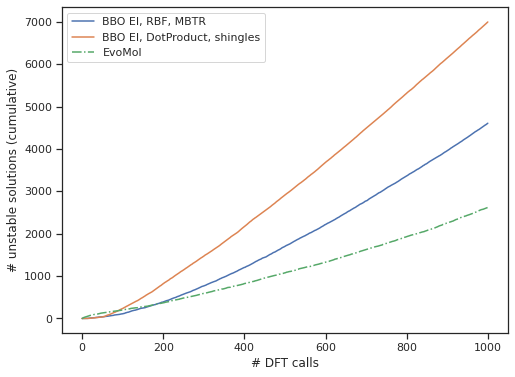

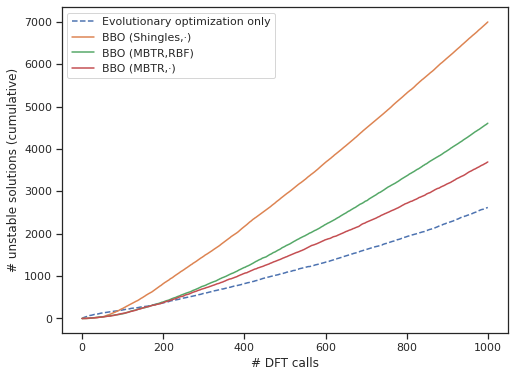

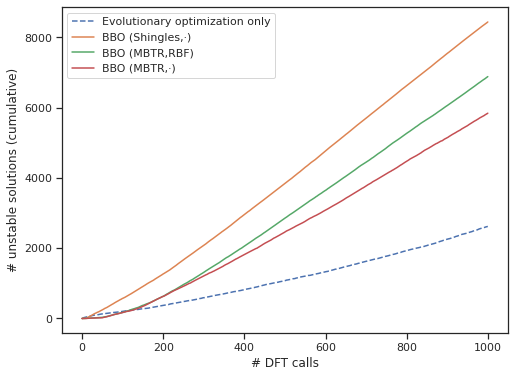

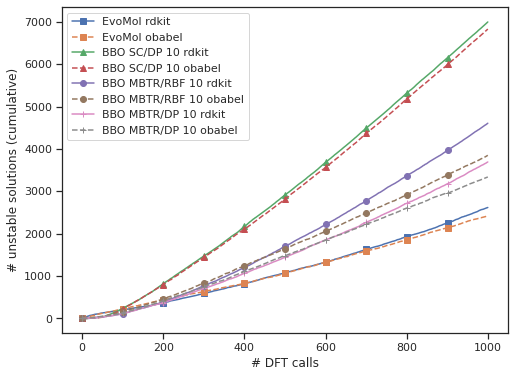

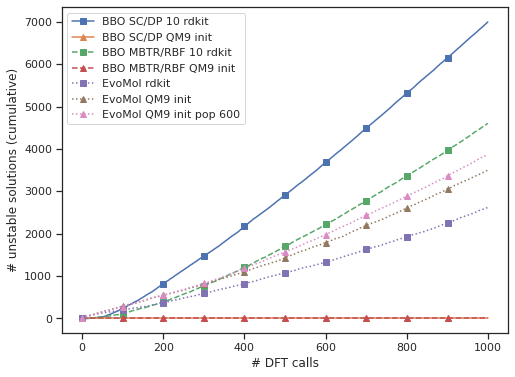

In [46]:
for group in groups:
    plot_stable_dynamics(results_dict, group[0], group[1], labels_dict=group[2], classes_dashes=group[3],
                         classes_markers=group[4])

In [47]:
evomol_max_times = np.array(results_dict["EvoMol rdkit"]["effective_last_timestamp"])

In [48]:
evomol_max_times.mean()/100

2430.983655623913